In [4]:
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.timeseries import LombScargle

In [2]:
#tic = ['39174351', '118269334', '16046443', '165547989']
tic = '39174351'

search = lk.search_lightcurve(f'TIC {tic}', author='SPOC', exptime=120)
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 22,2020,SPOC,120,39174351,0.0
1,TESS Sector 49,2022,SPOC,120,39174351,0.0


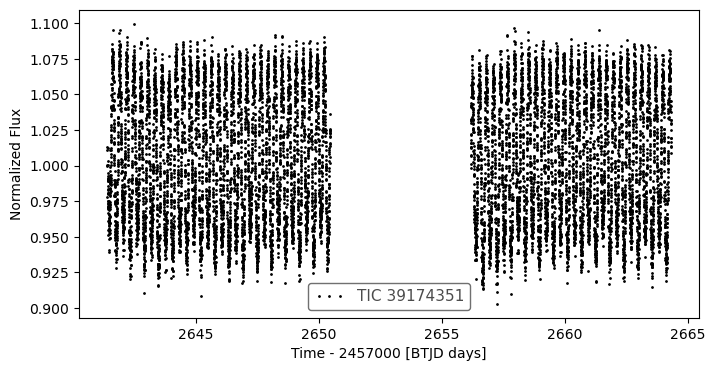

In [5]:
lc = search[1].download().normalize().remove_outliers(sigma=3.5)
#lc = search.download_all().stitch().remove_outliers(sigma=3.5)

fig, ax = plt.subplots(figsize=(8,4))
lc.plot(ax=ax, linewidth=0, marker='o', color='k', markersize=1)
plt.show()

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power'>

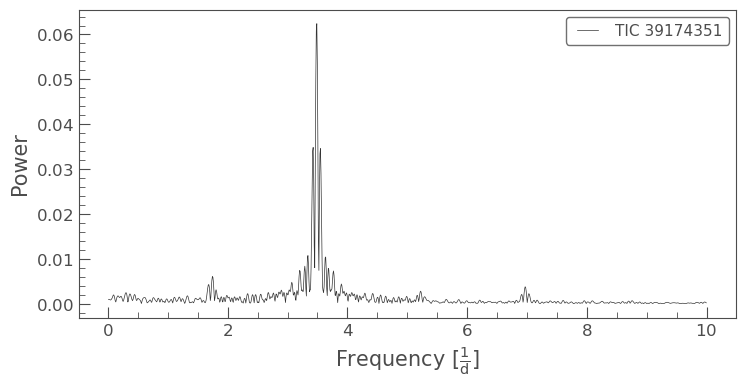

In [6]:
pg = lc.to_periodogram(maximum_frequency=10)
pg.plot()

In [7]:
pg_tab = pg.to_table()
pg_tab

frequency,period,power
1 / d,d,
float64,float64,float64
0.008723115686395291,114.63793854753247,0.0009671667383598694
0.017446231372790583,57.318969273766236,0.0009529439890700218
0.026169347059185874,38.212646182510824,0.0009215983270742627
0.034892462745581165,28.659484636883118,0.0008663258015872485
0.04361557843197646,22.927587709506497,0.0008108914422561848
0.05233869411837175,19.106323091255412,0.0008956971448127583
0.06106180980476704,16.37684836393321,0.0010942154086198404
0.06978492549116233,14.329742318441559,0.0012623221915648334


In [9]:
df_pg_tab = pg_tab.to_pandas()
table = df_pg_tab.filter(['power'])
table

,power
0,0.000967
1,0.000953
2,0.000922
3,0.000866
4,0.000811
...,...
1141,0.000348
1142,0.000375
1143,0.000342
1144,0.000270


In [14]:
ord_power = pd.DataFrame(data=sorted(table.power, reverse=True), columns=['ord_power'])
ord_power

,ord_power
0,0.062412
1,0.060857
2,0.053472
3,0.049241
4,0.036079
...,...
1141,0.000023
1142,0.000023
1143,0.000020
1144,0.000011


In [16]:
ord_power.loc[ord_power.index < 10]

,ord_power
0,0.062412
1,0.060857
2,0.053472
3,0.049241
4,0.036079
5,0.034833
6,0.034586
7,0.033968
8,0.033390
9,0.030182


In [17]:
data_table = pd.DataFrame(columns=['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9'])

temp_tab = pd.DataFrame(data={'p0': ord_power.ord_power[0], 'p1':ord_power.ord_power[1], 'p2':ord_power.ord_power[2], 'p3':ord_power.ord_power[3], 'p4':ord_power.ord_power[4], 'p5':ord_power.ord_power[5], 'p6':ord_power.ord_power[6], 'p7':ord_power.ord_power[7], 'p8':ord_power.ord_power[8], 'p9':ord_power.ord_power[9]}, index=[0])

data_table = pd.concat([data_table, temp_tab], axis=0)
data_table

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,0.062412,0.060857,0.053472,0.049241,0.036079,0.034833,0.034586,0.033968,0.03339,0.030182
